<a href="https://colab.research.google.com/github/YNWA-Algo/Lara4Council/blob/main/Police_Canada_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install PyGithub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [ ]:
import datetime
import csv
import os
import pandas as pd
from io import StringIO
import numpy as np
import requests  # to import dataset from my Github repo

In [ ]:

from github import Github


In [ ]:

# GitHub credentials NOTE - TO RUN CODE, REPLACE TOKEN. TOKEN IS REMOVED TO PUSH TO GITHUB
#GITHUB_TOKEN =
REPO_OWNER = 'YNWA-Algo'
REPO_NAME = 'Canada-Crime-Analytics'



In [ ]:

# Authenticate to your GitHub account
g = Github(GITHUB_TOKEN)

# Get the repository
repo = g.get_repo(f"{REPO_OWNER}/{REPO_NAME}")

# Get the content of the CSV file
file_content = repo.get_contents("Police_Canada_Crime2023.csv")
# Read the content of the CSV file
csv_content = file_content.decoded_content.decode('utf-8')
df = pd.read_csv(StringIO(csv_content))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## poke the data to get a high level overview of the dataste, size and attributes
# Number of rows
print(df.shape[0])

# Column names
print(df.columns.tolist())

# Data types
print(df.dtypes)

7771
['REF_DATE', 'GEO', 'DGUID', 'Statistics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']
REF_DATE           int64
GEO               object
DGUID             object
Statistics        object
UOM               object
UOM_ID             int64
SCALAR_FACTOR     object
SCALAR_ID          int64
VECTOR            object
COORDINATE       float64
VALUE            float64
STATUS            object
SYMBOL           float64
TERMINATED        object
DECIMALS           int64
dtype: object


In [ ]:
df.head()

,REF_DATE,GEO,DGUID,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1986,Canada,2016A000011124,Total number of all personnel,Number,223,units,0,v19457795,1.10,69698.0,NaN,NaN,NaN,0
1,1986,Canada,2016A000011124,Total number of police officers,Number,223,units,0,v19457793,1.20,51425.0,NaN,NaN,NaN,0
2,1986,Canada,2016A000011124,Men police officers,Number,223,units,0,v53509173,1.10,49431.0,NaN,NaN,NaN,0
3,1986,Canada,2016A000011124,Women police officers,Number,223,units,0,v53509174,1.11,1994.0,NaN,NaN,NaN,0
4,1986,Canada,2016A000011124,Total number of civilian and other personnel,Number,223,units,0,v19457794,1.30,18273.0,NaN,NaN,NaN,0


In [ ]:
df.tail()

,REF_DATE,GEO,DGUID,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
7766,2023,Royal Canadian Mounted Police (RCMP) operation...,NaN,Authorized police officer strength,Number,223,units,0,v65783656,16.12,2052.0,NaN,NaN,NaN,0
7767,2023,Royal Canadian Mounted Police (RCMP) operation...,NaN,"Authorized police officer strength per 100,000...",Rate,257,units,0,v80751154,16.13,NaN,..,NaN,NaN,0
7768,2023,Royal Canadian Mounted Police (RCMP) operation...,NaN,Criminal Code incidents per police officer,Rate,257,units,0,v80751158,16.70,NaN,..,NaN,NaN,0
7769,2023,Royal Canadian Mounted Police (RCMP) operation...,NaN,Crime severity index,Index,160,units,0,v80751155,16.14,NaN,..,NaN,NaN,0
7770,2023,Royal Canadian Mounted Police (RCMP) operation...,NaN,Weighted clearance rate,Rate,257,units,0,v80751156,16.15,NaN,..,NaN,NaN,0


In [ ]:
#check for NUll values in all columns
null_values=df.isnull().sum()
print("Null values count for each column:")
print(null_values)

Null values count for each column:
REF_DATE            0
GEO                 0
DGUID             625
Statistics          0
UOM                 0
UOM_ID              0
SCALAR_FACTOR       0
SCALAR_ID           0
VECTOR              0
COORDINATE          0
VALUE             788
STATUS           6983
SYMBOL           7771
TERMINATED       6660
DECIMALS            0
dtype: int64


In [ ]:
column_summary = df['STATUS'].describe()

#Display the Summary
print("Summary of column values in the column:")
print(column_summary)

Summary of column values in the column:
count     788
unique      1
top        ..
freq      788
Name: STATUS, dtype: object


In [ ]:
#Delete columns: SCALAR_ID; STATUS; DECIMALS; SYMBOL that have all null values and/or not useful to my analysis
columns_to_delete = ['SCALAR_ID', 'STATUS', 'DECIMALS', 'SYMBOL']

# Delete the specified columns
df = df.drop(columns=columns_to_delete)

# Display the updated DataFrame
df.head()


,REF_DATE,GEO,DGUID,Statistics,UOM,UOM_ID,SCALAR_FACTOR,VECTOR,COORDINATE,VALUE,TERMINATED
0,1986,Canada,2016A000011124,Total number of all personnel,Number,223,units,v19457795,1.10,69698.0,NaN
1,1986,Canada,2016A000011124,Total number of police officers,Number,223,units,v19457793,1.20,51425.0,NaN
2,1986,Canada,2016A000011124,Men police officers,Number,223,units,v53509173,1.10,49431.0,NaN
3,1986,Canada,2016A000011124,Women police officers,Number,223,units,v53509174,1.11,1994.0,NaN
4,1986,Canada,2016A000011124,Total number of civilian and other personnel,Number,223,units,v19457794,1.30,18273.0,NaN


In [ ]:

# Replace/rename long string value with shortened name
df['GEO'] = df['GEO'].replace('Royal Canadian Mounted Police (RCMP) operation and corporate headquarters, training academy depot division and forensic labs', 'RCMP')

df.head()


,REF_DATE,GEO,DGUID,Statistics,UOM,UOM_ID,SCALAR_FACTOR,VECTOR,COORDINATE,VALUE,TERMINATED
0,1986,Canada,2016A000011124,Total number of all personnel,Number,223,units,v19457795,1.10,69698.0,NaN
1,1986,Canada,2016A000011124,Total number of police officers,Number,223,units,v19457793,1.20,51425.0,NaN
2,1986,Canada,2016A000011124,Men police officers,Number,223,units,v53509173,1.10,49431.0,NaN
3,1986,Canada,2016A000011124,Women police officers,Number,223,units,v53509174,1.11,1994.0,NaN
4,1986,Canada,2016A000011124,Total number of civilian and other personnel,Number,223,units,v19457794,1.30,18273.0,NaN


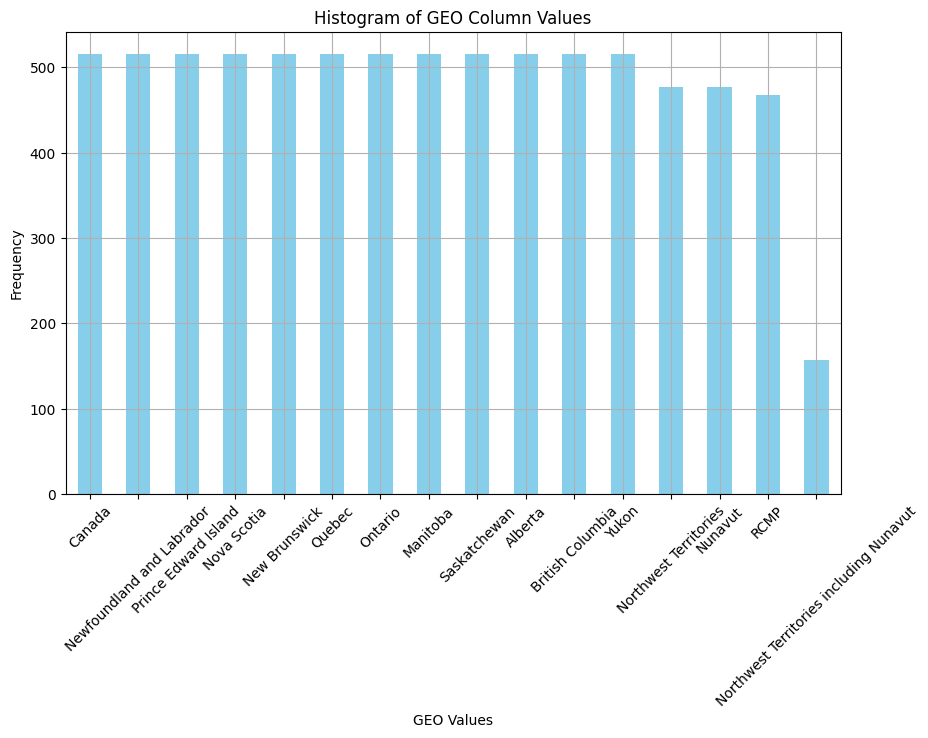

In [ ]:
# Plot histogram of 'GEO' column values to validate that the RCMP (the shortened form has now replaced the long string)
plt.figure(figsize=(10, 6))
df['GEO'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of GEO Column Values')
plt.xlabel('GEO Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Rename the column title 'GEO' to a new name
df = df.rename(columns={'GEO': 'JURISDICTION' , 'Statistics': 'DESCRIPTION'})

# Display the updated DataFrame
print("DataFrame after renaming column 'GEO':")
df.tail(50)


DataFrame after renaming column 'GEO':


,REF_DATE,JURISDICTION,DGUID,DESCRIPTION,UOM,UOM_ID,SCALAR_FACTOR,VECTOR,COORDINATE,VALUE,TERMINATED
7721,2023,British Columbia,2016A000259,Crime severity index,Index,160,units,v65783600,11.14,100.37,NaN
7722,2023,British Columbia,2016A000259,Weighted clearance rate,Rate,257,units,v65783601,11.15,23.17,NaN
7723,2023,Yukon,2016A000260,Total number of all personnel,Number,223,units,v19457872,12.10,206.00,NaN
7724,2023,Yukon,2016A000260,Total number of police officers,Number,223,units,v19457870,12.20,146.00,NaN
7725,2023,Yukon,2016A000260,Men police officers,Number,223,units,v53509179,12.10,111.00,NaN
7726,2023,Yukon,2016A000260,Women police officers,Number,223,units,v53509180,12.11,35.00,NaN
7727,2023,Yukon,2016A000260,Total number of civilian and other personnel,Number,223,units,v19457871,12.30,60.00,NaN
7728,2023,Yukon,2016A000260,Police-civilian ratio,Ratio,270,units,v19457873,12.40,2.40,NaN
7729,2023,Yukon,2016A000260,"Police officers per 100,000 population",Rate,257,units,v19457875,12.60,324.60,NaN
7730,2023,Yukon,2016A000260,Authorized police officer strength,Number,223,units,v65783610,12.12,141.00,NaN


In [ ]:
# Further replace some long names in the Jurisduction Column with shorter names for easier graphing and labeling
# Define the replacements
replacements = {
    "Newfoundland and Labrador": "NF&LBR",
    "Northwest Territories including Nunavut": "NWT&NUNT",
    "Northwest Territories": "NWT",
    "Nunavut": "NUNVT",
    "Prince Edward Island": "PEI",
    "New Brunswick": "NB",
    "Saskatchewan": "Sask",
    "British Columbia": "BC",
    "Nova Scotia": "NS"
}

# Replace the values in the 'Jurisdiction' column
df["JURISDICTION"] = df["JURISDICTION"].replace(replacements, regex=True)

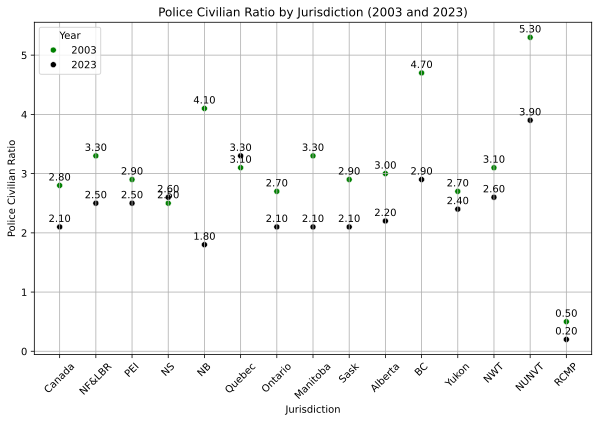

In [ ]:
# Filter the DataFrame for the years 2003 and 2023
filtered_df = df[df['REF_DATE'].isin([2003, 2023])]

# Filter the DataFrame for the column 'DESCRIPTION' containing 'Police-civilian ratio'
filtered_df = filtered_df[filtered_df['DESCRIPTION'].str.contains('Police-civilian ratio')]

# Create a custom color palette for the scatter plot
custom_palette = {2003: 'green', 2023: 'black'}

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='JURISDICTION', y='VALUE', hue='REF_DATE', palette=custom_palette)

# Annotate the data points for 2003 and 2023
for index, row in filtered_df.iterrows():
    if row['REF_DATE'] in [2003, 2023]:
        plt.annotate(f"{row['VALUE']:.2f}", (row['JURISDICTION'], row['VALUE']), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Police Civilian Ratio by Jurisdiction (2003 and 2023)')
plt.xlabel('Jurisdiction')
plt.ylabel('Police Civilian Ratio')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from tabulate import tabulate


# Group by 'JURISDICTION' and 'REF_DATE', calculate the mean of 'VALUE'
result = filtered_df.groupby(['JURISDICTION', 'REF_DATE'])['VALUE'].mean().reset_index()

# Pivot the table to create the desired format
pivot_table = result.pivot(index='JURISDICTION', columns='REF_DATE', values='VALUE')


# Print the tabulated table of police to civilian ratio by jurisdiction
print(tabulate(pivot_table, headers='keys', tablefmt='grid'))



+----------------+--------+--------+
| JURISDICTION   |   2003 |   2023 |
+================+========+========+
| Alberta        |    3   |    2.2 |
+----------------+--------+--------+
| BC             |    4.7 |    2.9 |
+----------------+--------+--------+
| Canada         |    2.8 |    2.1 |
+----------------+--------+--------+
| Manitoba       |    3.3 |    2.1 |
+----------------+--------+--------+
| NB             |    4.1 |    1.8 |
+----------------+--------+--------+
| NF&LBR         |    3.3 |    2.5 |
+----------------+--------+--------+
| NS             |    2.5 |    2.6 |
+----------------+--------+--------+
| NUNVT          |    5.3 |    3.9 |
+----------------+--------+--------+
| NWT            |    3.1 |    2.6 |
+----------------+--------+--------+
| Ontario        |    2.7 |    2.1 |
+----------------+--------+--------+
| PEI            |    2.9 |    2.5 |
+----------------+--------+--------+
| Quebec         |    3.1 |    3.3 |
+----------------+--------+--------+
|

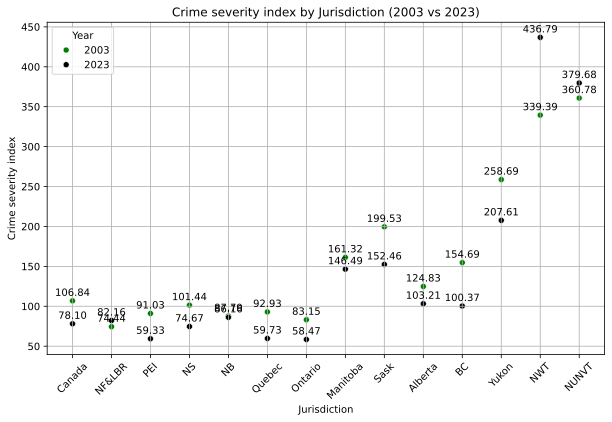

In [ ]:
# Filter the DataFrame for the years 2003 and 2023
filtered_df2 = df[df['REF_DATE'].isin([2003, 2023])]

# Filter the DataFrame for the column 'DESCRIPTION' containing 'Crime severity index'
filtered_df2 = filtered_df2[filtered_df2['DESCRIPTION'].str.contains('Crime severity index')]

# Create a custom color palette for the scatter plot
custom_palette = {2003: 'green', 2023: 'black'}

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df2, x='JURISDICTION', y='VALUE', hue='REF_DATE', palette=custom_palette)

# Annotate the data points for 2003 and 2023
for index, row in filtered_df2.iterrows():
    if row['REF_DATE'] in [2003, 2023]:
        plt.annotate(f"{row['VALUE']:.2f}", (row['JURISDICTION'], row['VALUE']), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Crime severity index by Jurisdiction (2003 vs 2023)')
plt.xlabel('Jurisdiction')
plt.ylabel('Crime severity index')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [ ]:
# Group by 'JURISDICTION' and 'REF_DATE', calculate the mean of 'VALUE'
result2 = filtered_df2.groupby(['JURISDICTION', 'REF_DATE'])['VALUE'].mean().reset_index()

# Pivot the table to create the desired format
pivot_table2 = result2.pivot(index='JURISDICTION', columns='REF_DATE', values='VALUE')


# Print the tabulated table
print(tabulate(pivot_table2, headers='keys', tablefmt='grid'))

+----------------+--------+--------+
| JURISDICTION   |   2003 |   2023 |
+================+========+========+
| Alberta        | 124.83 | 103.21 |
+----------------+--------+--------+
| BC             | 154.69 | 100.37 |
+----------------+--------+--------+
| Canada         | 106.84 |  78.1  |
+----------------+--------+--------+
| Manitoba       | 161.32 | 146.49 |
+----------------+--------+--------+
| NB             |  87.79 |  86.16 |
+----------------+--------+--------+
| NF&LBR         |  74.44 |  82.16 |
+----------------+--------+--------+
| NS             | 101.44 |  74.67 |
+----------------+--------+--------+
| NUNVT          | 360.78 | 379.68 |
+----------------+--------+--------+
| NWT            | 339.39 | 436.79 |
+----------------+--------+--------+
| Ontario        |  83.15 |  58.47 |
+----------------+--------+--------+
| PEI            |  91.03 |  59.33 |
+----------------+--------+--------+
| Quebec         |  92.93 |  59.73 |
+----------------+--------+--------+
|

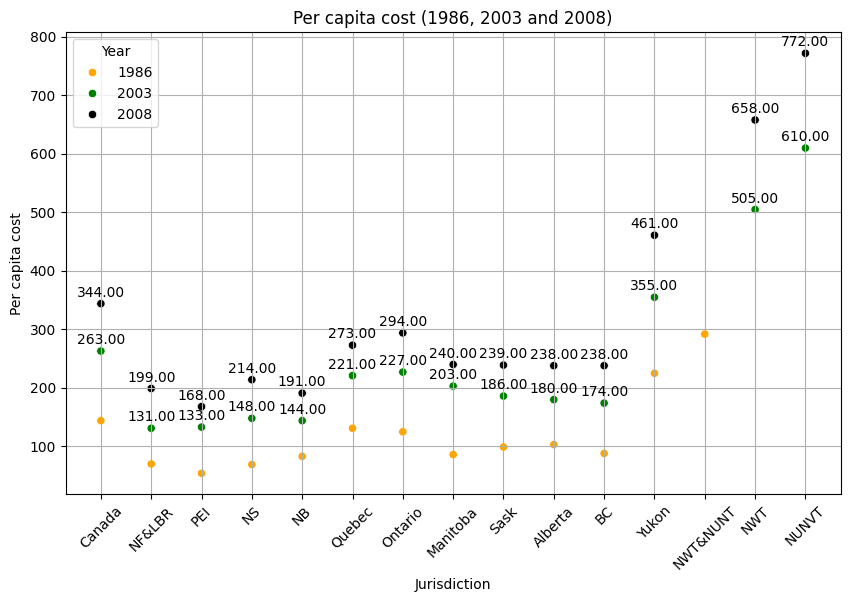

In [ ]:
# Filter the DataFrame for the years 1986, 2003 and 2008
filtered_df3 = df[df['REF_DATE'].isin([1986,2003, 2008])]

# Filter the DataFrame for the column 'DESCRIPTION' containing 'Total expenditures on policing'
filtered_df3 = filtered_df3[filtered_df3['DESCRIPTION'].str.contains('Per capita cost')]

# Create a custom color palette for the scatter plot
custom_palette = {1986: 'orange', 2003: 'green', 2008: 'black'}

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df3, x='JURISDICTION', y='VALUE', hue='REF_DATE', palette=custom_palette)

# Annotate the data points for 2003 and 2008
for index, row in filtered_df3.iterrows():
    if row['REF_DATE'] in [2003, 2008]:
        plt.annotate(f"{row['VALUE']:.2f}", (row['JURISDICTION'], row['VALUE']), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Per capita cost (1986, 2003 and 2008)')
plt.xlabel('Jurisdiction')
plt.ylabel('Per capita cost')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [ ]:
# Group by 'JURISDICTION' and 'REF_DATE', calculate the mean of 'VALUE'
result3 = filtered_df3.groupby(['JURISDICTION', 'REF_DATE'])['VALUE'].mean().reset_index()

# Pivot the table to create the desired format
pivot_table3 = result3.pivot(index='JURISDICTION', columns='REF_DATE', values='VALUE')


# Print the tabulated table
print(tabulate(pivot_table3, headers='keys', tablefmt='grid'))

+----------------+--------+--------+--------+
| JURISDICTION   |   1986 |   2003 |   2008 |
+================+========+========+========+
| Alberta        |    103 |    180 |    238 |
+----------------+--------+--------+--------+
| BC             |     88 |    174 |    238 |
+----------------+--------+--------+--------+
| Canada         |    144 |    263 |    344 |
+----------------+--------+--------+--------+
| Manitoba       |     86 |    203 |    240 |
+----------------+--------+--------+--------+
| NB             |     83 |    144 |    191 |
+----------------+--------+--------+--------+
| NF&LBR         |     70 |    131 |    199 |
+----------------+--------+--------+--------+
| NS             |     69 |    148 |    214 |
+----------------+--------+--------+--------+
| NUNVT          |    nan |    610 |    772 |
+----------------+--------+--------+--------+
| NWT            |    nan |    505 |    658 |
+----------------+--------+--------+--------+
| NWT&NUNT       |    292 |    nan

Conducting Hypothesis Tests

In [ ]:
%pylab inline

%config InlineBackend.figure_formats = ['svg']

from scipy import stats
import math
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

Populating the interactive namespace from numpy and matplotlib


**Observation from exploratory data analysis:** The Province of New Brunswick saw the largest drop in police-to-civilian ratio between 2003 and 2023 (20 years)

The related business and policy question: Is there an impact in crime rate in NB in 2003 vs 2023?

**Statistical translation**:

**NULL:** There is no statistically significant difference in crime rates in the province of New Brunswick (NB) in 2003 vs 2023

**Alternative:** There is a statistically significant difference in crime rates in NB over the past 20 years (2003 vs 2023)

Assuming normality:

**Level of Significance is 5%**

In [ ]:
# Extracting mean value for crime severity index in 2023 for NB
province_name = 'NB'
nb_data = filtered_df2.loc[filtered_df2['JURISDICTION'] == province_name]

# Get the crime severity indeces for the years 2003 and 2023 for NB
nbcrime_rate_2023 = nb_data.loc[nb_data['REF_DATE'] == 2023, 'VALUE'].values[0]
nbcrime_rate_2003 = nb_data.loc[nb_data['REF_DATE'] == 2003, 'VALUE'].values[0]

print(f"The crime rate for {province_name} in 2023 is: {nbcrime_rate_2023:.2f}")
print(f"The crime rate for {province_name} in 2003 is: {nbcrime_rate_2003:.2f}")


The crime rate for NB in 2023 is: 86.16
The crime rate for NB in 2003 is: 87.79


In [ ]:
# Perform a two-sample t-test with equal variances
t_value, p_value = stats.ttest_ind(nbcrime_rate_2003, nbcrime_rate_2023, equal_var=True)
# Check if the p-value is less than alpha (0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: Means are different.")
else:
    print("Fail to reject the null hypothesis: Means are not significantly different.")
print("t_value = ", t_value, ", p_value = ", p_value)

Fail to reject the null hypothesis: Means are not significantly different.
t_value =  nan , p_value =  nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
